In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

In [13]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [9]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [15]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [30]:
c = cast[cast['character'].isin(['Superman','Batman'])]
c = c.groupby(['year','character']).size()
c = c.unstack(1).fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [28]:
sum(c.Batman > c.Superman)

25

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [33]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.head()

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,NaN
1905,1.0,NaN
1906,14.0,3.0
1907,5.0,NaN


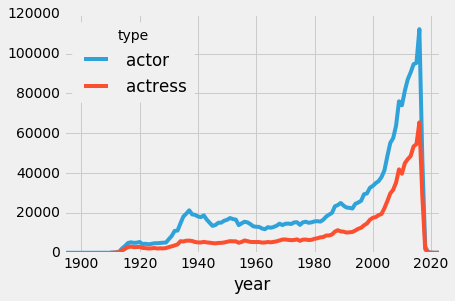

In [34]:
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

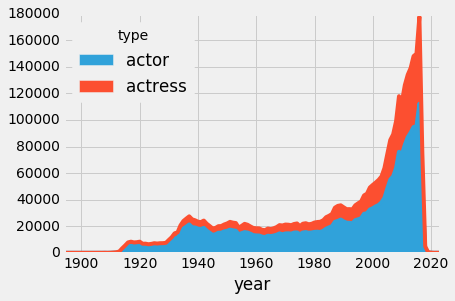

In [35]:
c.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

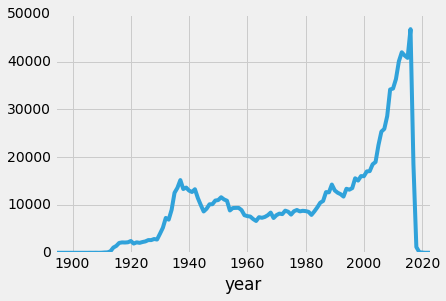

In [54]:
c['diff'] = abs(c.actress - c.actor).fillna(0).plot()


### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

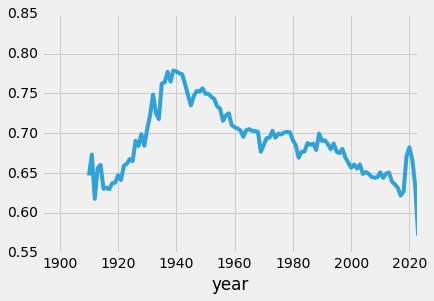

In [55]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

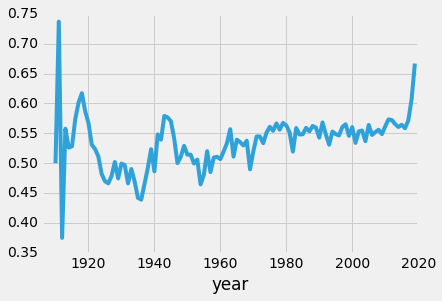

In [62]:
c = cast[cast.n == 2]
c = c.groupby(['year','type']).size()
c = c.unstack(1)
(c.actor / (c.actor + c.actress)).plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

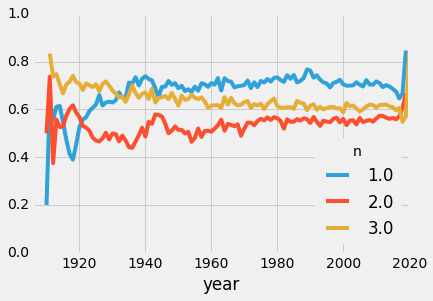

In [67]:
c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])